In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = '/content/drive/MyDrive/Doutorado/Artigos/inflacao-twitter/output/'
years = np.arange(2011, 2021)
datasets = []
for year in years:
    filename = file_path + str(year) + '.csv'
    dataset = pd.read_csv(filename, header=None,
                          usecols=[1, 6], index_col=0)
    datasets.append(dataset)

In [5]:
data = pd.concat(datasets, axis=1)
data.columns = [str(x) for x in years]
data.to_csv(file_path + 'betweenness.csv')

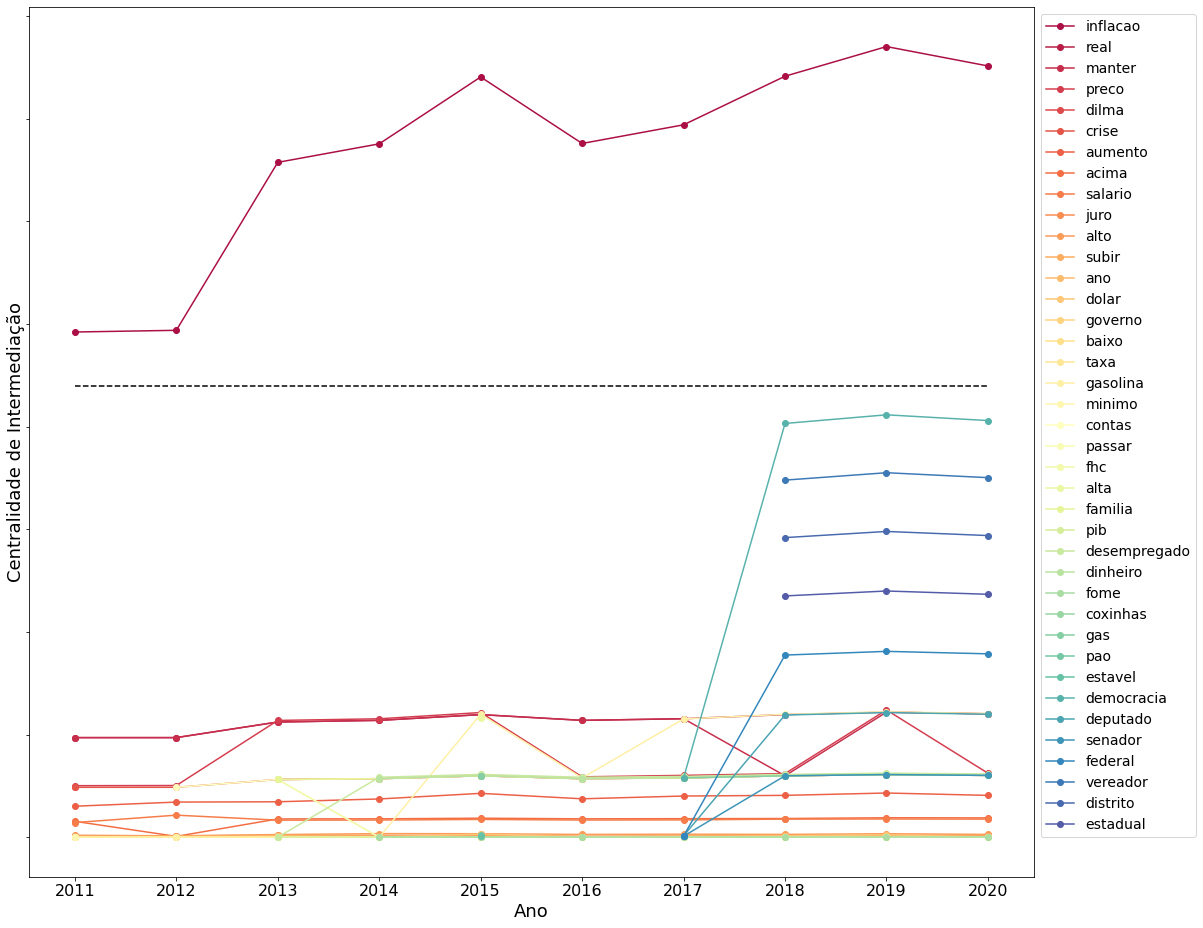

In [6]:
data.loc['inflacao', :] /= 6

plt.figure(figsize=(18, 16))
with sns.color_palette('Spectral', n_colors=len(data.index)):
    plt.plot(data.T, marker='o')
plt.hlines(1100, data.T.index.min(), data.T.index.max(), linestyles='dashed')
plt.legend(data.index, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.yticks(visible=False)
plt.ylabel('Centralidade de Intermediação', fontsize=18)
plt.xticks(fontsize=16)
plt.xlabel('Ano', fontsize=18)
plt.show()